In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

%load_ext autoreload
%autoreload 2

Fri Mar 27 21:52:52 PDT 2020


# Load CORD_19 metadata

In [7]:
df = pd.read_csv("~/Desktop/8-AI-Mapping-of-Relevant-Coronavirus-Literature/big_data/cord_19.csv")

In [26]:
df

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text,full_text_file,url
0,vho70jcx,f056da9c64fbf00a4645ae326e8a4339d015d155,biorxiv,SIANN: Strain Identification by Alignment to N...,10.1101/001727,NaN,NaN,biorxiv,Next-generation sequencing is increasingly bei...,2014-01-10,Samuel Minot; Stephen D Turner; Krista L Ternu...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/001727
1,i9tbix2v,daf32e013d325a6feb80e83d15aabc64a48fae33,biorxiv,Spatial epidemiology of networked metapopulati...,10.1101/003889,NaN,NaN,biorxiv,An emerging disease is one infectious epidemic...,2014-06-04,Lin WANG; Xiang Li,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/003889
2,62gfisc6,f33c6d94b0efaa198f8f3f20e644625fa3fe10d2,biorxiv,Sequencing of the human IG light chain loci fr...,10.1101/006866,NaN,NaN,biorxiv,Germline variation at immunoglobulin gene (IG)...,2014-07-03,Corey T Watson; Karyn Meltz Steinberg; Tina A ...,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/006866
3,058r9486,4da8a87e614373d56070ed272487451266dce919,biorxiv,Bayesian mixture analysis for metagenomic comm...,10.1101/007476,NaN,NaN,biorxiv,Deep sequencing of clinical samples is now an ...,2014-07-25,Sofia Morfopoulou; Vincent Plagnol,NaN,NaN,NaN,True,biorxiv_medrxiv,https://doi.org/10.1101/007476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45770,66jumbir,21a4369f83891bf6975dd916c0aa495d5df8709e,Elsevier,Viruses and asthma,10.1016/j.bbagen.2011.01.012,PMC3130828,21291960.0,els-covid,Abstract Background Viral respiratory infectio...,2011-11-30,"Dulek, Daniel E.; Peebles, R. Stokes",Biochimica et Biophysica Acta (BBA) - General ...,NaN,NaN,True,custom_license,https://doi.org/10.1016/j.bbagen.2011.01.012
45771,3wk36h9p,NaN,Elsevier,Why the WHO won't use the p-word,10.1016/s0262-4079(20)30474-7,NaN,NaN,els-covid,"There are no criteria for a pandemic, but covi...",2020-03-07,"MacKenzie, Debora",New Scientist,NaN,#5716,False,custom_license,https://doi.org/10.1016/s0262-4079(20)30474-7
45772,0ujw0gak,NaN,WHO,"Communication, transparency key as Canada face...",10.1503/cmaj.1095846,PMC7030882,32071113.0,unk,NaN,2020-02-17,"Glauser, Wendy",Canadian Medical Association Journal,1.953688e+09,#4117,False,NaN,https://doi.org/10.1503/cmaj.1095846
45773,28vx9w58,3369a14e1d116943f48b3a33597796c9802de279; f523...,PMC,Searching for animal models and potential targ...,10.1016/j.onehlt.2017.03.001,PMC5454147,28616501.0,cc-by-nc-nd,Emerging and re-emerging pathogens represent a...,2017-03-03,"Vergara-Alert, Júlia; Vidal, Enric; Bensaid, A...",One Health,NaN,NaN,True,noncomm_use_subset,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...


In [9]:
import nltk; nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/lu_qxl/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [58]:
# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

#!python3 -m spacy download en_core_web_sm

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim

In [16]:
# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import string

# PART 1: title

# Data Cleaning

In [28]:
df_title = df[df['title'].notnull()]
def clean_data(data):
    data = [word.lower() for word in data.split()]
    table = str.maketrans('', '', string.punctuation)
    data = [word.translate(table) for word in data]
    data = [word for word in data if word.isalpha()]
    data = [word for word in data if word not in nltk.corpus.stopwords.words('english')]
    return data

data = list(df_title['title'].apply(lambda x : clean_data(x)))
data[:10]

[['siann', 'strain', 'identification', 'alignment', 'near', 'neighbors'],
 ['spatial', 'epidemiology', 'networked', 'metapopulation', 'overview'],
 ['sequencing',
  'human',
  'ig',
  'light',
  'chain',
  'loci',
  'hydatidiform',
  'mole',
  'bac',
  'library',
  'reveals',
  'locusspecific',
  'signatures',
  'genetic',
  'diversity'],
 ['bayesian', 'mixture', 'analysis', 'metagenomic', 'community', 'profiling'],
 ['mapping',
  'viral',
  'phylogeny',
  'onto',
  'outbreak',
  'trees',
  'improve',
  'host',
  'transmission',
  'inference'],
 ['infant',
  'airway',
  'microbiome',
  'health',
  'disease',
  'impacts',
  'later',
  'asthma',
  'development'],
 ['using',
  'heterogeneity',
  'population',
  'structure',
  'us',
  'swine',
  'farms',
  'compare',
  'transmission',
  'models',
  'porcine',
  'epidemic',
  'diarrhoea'],
 ['big',
  'city',
  'small',
  'world',
  'density',
  'contact',
  'rates',
  'transmission',
  'dengue',
  'across',
  'pakistan'],
 ['merscov',
  're

In [45]:
# lemmatization
import en_core_web_sm
nlp = en_core_web_sm.load(disable=["parser", "ner"])
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
data_lemmatized = [[word.lemma_ for word in nlp(str(' '.join(doc))) if word.pos_ in allowed_postags] for doc in data]
data_lemmatized[:5]

[['identification', 'alignment', 'neighbor'],
 ['spatial', 'epidemiology', 'network', 'metapopulation', 'overview'],
 ['sequence',
  'light',
  'chain',
  'library',
  'reveal',
  'locusspecific',
  'signature',
  'genetic',
  'diversity'],
 ['community', 'profiling'],
 ['map',
  'viral',
  'phylogeny',
  'outbreak',
  'tree',
  'improve',
  'host',
  'transmission',
  'inference']]

# Latent Dirichlet Allocation(LDA)

In [50]:
# Create dictionary
id2word = gensim.corpora.Dictionary(data_lemmatized)

# Create COrpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

print([[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]])

[[(0, 1), (1, 1), (2, 1)]]
[[('alignment', 1), ('identification', 1), ('neighbor', 1)]]


num topics = 10 has Coherence Value of 0.3486
num topics = 15 has Coherence Value of 0.3642
num topics = 20 has Coherence Value of 0.3632
num topics = 25 has Coherence Value of 0.3757
num topics = 30 has Coherence Value of 0.3995
num topics = 35 has Coherence Value of 0.4351
num topics = 40 has Coherence Value of 0.4454
num topics = 45 has Coherence Value of 0.4578
num topics = 50 has Coherence Value of 0.4847
num topics = 55 has Coherence Value of 0.4721
num topics = 60 has Coherence Value of 0.4922
num topics = 65 has Coherence Value of 0.4879
num topics = 70 has Coherence Value of 0.4824
num topics = 75 has Coherence Value of 0.4714
num topics = 80 has Coherence Value of 0.4397
num topics = 85 has Coherence Value of 0.4175
num topics = 90 has Coherence Value of 0.3952
num topics = 95 has Coherence Value of 0.3366


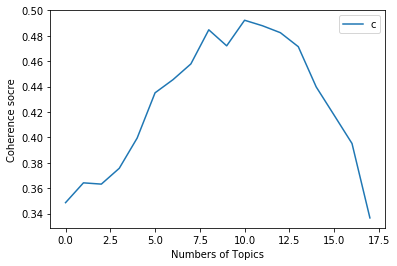

In [53]:
# Find the optimal number of topics 
start = 10
limit = 100
step = 5
topic_range = range(start, limit, step)

coherence_value = []
model_list = []
for num_topics in topic_range:
    model = gensim.models.ldamodel.LdaModel(corpus=corpus,id2word=id2word,
                                           num_topics=num_topics)
    model_list.append(model)
    coherencemodel = gensim.models.coherencemodel.CoherenceModel(model = model, texts = data_lemmatized, 
                                                                dictionary = id2word, coherence = 'c_v')
    coherence_value.append(coherencemodel.get_coherence())

max_coherence_val = 0
optimal_model = None

# print the coherence scores
for i, (m, cv) in enumerate(zip(topic_range, coherence_value)):
    if max_coherence_val < round(cv, 4):
        optimal_model = model_list[i]
        optimal_num_topics = m
        max_coherence_val = round(cv, 4)
        
    print("num topics =", m, "has Coherence Value of", round(cv, 4))

# plot coherence results
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Numbers of Topics")
plt.ylabel("Coherence socre")
plt.legend(("coherence_value"), loc = 'best')
plt.show()


In [62]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=60, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=2,
                                           alpha='auto',
                                           per_word_topics=True)

In [63]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -46.21804396381344

Coherence Score:  0.5317374862762112


In [64]:
# Visualize the topics
# pyLDAvis.enable_notebook()
# vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
# vis

In [65]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=df_title['title'])

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,54.0,0.5083,"identification, rapid, quantitative, proteomic...",SIANN: Strain Identification by Alignment to N...
1,1,28.0,0.2542,"network, identify, polymerase, chronic, chain,...",Spatial epidemiology of networked metapopulati...
2,2,54.0,0.3654,"identification, rapid, quantitative, proteomic...",Sequencing of the human IG light chain loci fr...
3,3,26.0,0.3389,"diagnostic, future, update, assessment, prepar...",Bayesian mixture analysis for metagenomic comm...
...,...,...,...,...,...
6,6,55.0,0.4967,"pulmonary, porcine, exacerbation, testing, num...",Using heterogeneity in the population structur...
7,7,30.0,0.2017,"high, reduce, age, pathway, rate, incidence, l...","Big city, small world: Density, contact rates,..."
8,8,46.0,0.2034,"molecular, induce, animal, implication, low, v...",MERS-CoV recombination: implications about the...
9,9,52.0,0.2542,"common, membrane, survey, evolutionary, monito...",On the causes of evolutionary transition:trans...


In [69]:
df_dominant_topic.Keywords[1]

'network, identify, polymerase, chronic, chain, reaction, important, serological, value, distinct'

In [70]:
df_dominant_topic.Text[1]

'Spatial epidemiology of networked metapopulation: An overview'

In [75]:
df_dominant_topic.to_csv("title.csv")

# Part 2: Abstract

In [76]:
df_abstract = df[df['abstract'].notnull()]
abstract = list(df_abstract['abstract'].apply(lambda x : clean_data(x)))
abstract[:10]

[['nextgeneration',
  'sequencing',
  'increasingly',
  'used',
  'study',
  'samples',
  'composed',
  'mixtures',
  'organisms',
  'clinical',
  'applications',
  'presence',
  'pathogen',
  'low',
  'abundance',
  'may',
  'highly',
  'important',
  'present',
  'analytical',
  'method',
  'siann',
  'strain',
  'identification',
  'alignment',
  'near',
  'neighbors',
  'specifically',
  'designed',
  'rapidly',
  'detect',
  'set',
  'target',
  'organisms',
  'mixed',
  'samples',
  'achieves',
  'high',
  'degree',
  'species',
  'strainspecificity',
  'aligning',
  'short',
  'sequence',
  'reads',
  'genomes',
  'near',
  'neighbor',
  'organisms',
  'well',
  'target',
  'empirical',
  'benchmarking',
  'alongside',
  'current',
  'stateoftheart',
  'methods',
  'shows',
  'extremely',
  'high',
  'positive',
  'predictive',
  'value',
  'even',
  'low',
  'abundances',
  'target',
  'organism',
  'mixed',
  'sample',
  'siann',
  'available',
  'illumina',
  'basespace',
  '

In [ ]:
# lemmatization
allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']
abstract_lemmatized = [[word.lemma_ for word in nlp(str(' '.join(doc))) if word.pos_ in allowed_postags] for doc in abstract]
abstract_lemmatized[:5]